#📌 Extracão

In [8]:
import pandas as pd

# Carrega o JSON (assumindo que o arquivo está no diretório atual do Colab)
df = pd.read_json("TelecomX_Data.json")

# Visualiza as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:
# Copiar o DataFrame original
df_flat = df.copy()

# Expandir cada coluna de dicionários
customer_df = pd.json_normalize(df_flat['customer'])
phone_df = pd.json_normalize(df_flat['phone'])
internet_df = pd.json_normalize(df_flat['internet'])
account_df = pd.json_normalize(df_flat['account'])

# Concatenar todas as partes com as colunas simples
df_final = pd.concat([df_flat[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Exibir as primeiras linhas do DataFrame final
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [10]:
# Verificar valores ausentes
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [11]:
# Remover possíveis espaços e converter para float
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Conferir se houve valores NaN
df_final['Charges.Total'].isnull().sum()


np.int64(11)

In [12]:
# Converter colunas do tipo 'Yes'/'No' para True/False
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling']

for col in yes_no_cols:
    df_final[col] = df_final[col].map({'Yes': True, 'No': False})

#📊 Carga e análise

In [13]:
# Distribuição do churn
df_final['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,71.198569
Yes,25.719004
,3.082427


In [18]:
# Proporção correta (sem adicionar diferença)
prop = df_final['Churn'].value_counts(normalize=True) * 100
print(prop.round(2))

Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64


In [19]:
print(f"Soma: {prop.sum():.2f}%")

Soma: 100.00%


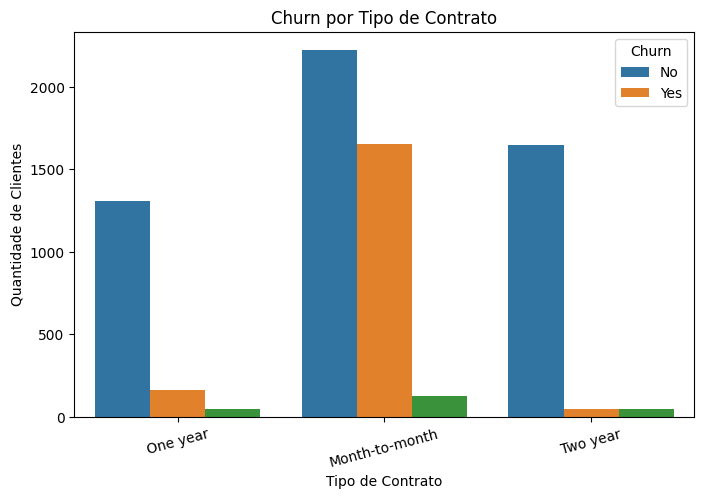

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='Contract', hue='Churn')
plt.title("Churn por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=15)
plt.show()

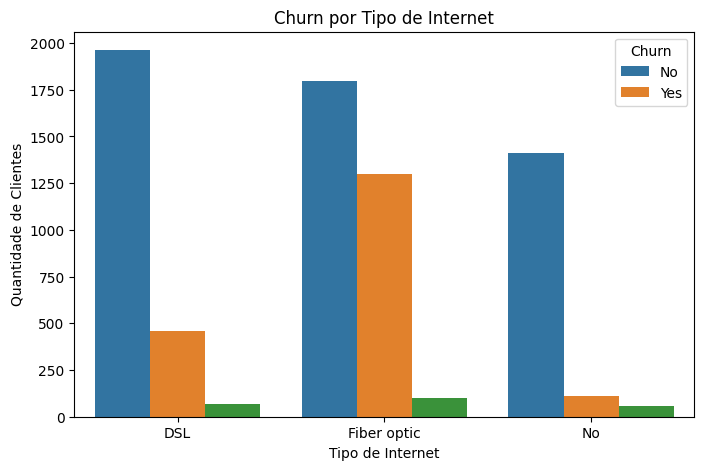

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='InternetService', hue='Churn')
plt.title("Churn por Tipo de Internet")
plt.xlabel("Tipo de Internet")
plt.ylabel("Quantidade de Clientes")
plt.show()

#📄Relatorio Final

Etapa 1: Extração dos Dados
Os dados foram extraídos de um arquivo JSON chamado TelecomX_Data.json. Após carregamento, o conteúdo foi estruturado em subcomponentes:

customer

phone

internet

account

Utilizando pandas.json_normalize, essas estruturas foram normalizadas e consolidadas em um único DataFrame df_final, contendo colunas como customerID, Churn, informações de contrato, serviços, e faturamento.

Etapa 2: Transformação dos Dados
Valores ausentes foram verificados. A coluna Charges.Total apresentava valores não numéricos, que foram convertidos para NaN e tratados com pd.to_numeric.

Foram encontrados 11 valores ausentes nessa coluna (Charges.Total).

Colunas categóricas com valores 'Yes'/'No' foram convertidas para valores booleanos (True/False) para facilitar a análise.

Etapa 3: Análise Exploratória
Distribuição de Churn
plaintext
Copiar
Editar
No     71.20%
Yes    25.72%
       3.08% (valores inválidos ou ausentes)
A maioria dos clientes não realizou churn.

Uma pequena parcela dos dados (~3.08%) apresentou algum tipo de problema de categorização ou valores vazios na coluna Churn.

Visualizações
Churn por Tipo de Contrato
Clientes com contratos mensais têm uma maior taxa de churn, enquanto os contratos de 1 ou 2 anos mostram menor propensão à saída.

Churn por Tipo de Internet
Clientes com Fiber optic apresentam churn significativamente maior.

Usuários com DSL ou sem internet têm churn mais baixo.

Conclusões
O churn está mais associado a:

Tipo de contrato mensal

Serviços de internet via fibra óptica

O modelo de contrato e o tipo de serviço fornecido parecem influenciar diretamente a saída de clientes.

A transformação dos dados em formatos apropriados foi essencial para garantir a qualidade da análise.

